![apicom.pro](https://deidentify.online/media/filer_public/de/fe/defef052-b877-4052-a9b1-e80cc218fcf4/sparkpdflogo.png)

<p align="center">
    <a href="https://circleci.com/gh/stabrise/spark-pdf"><img alt="Build" src="https://img.shields.io/circleci/build/github/stabrise/spark-pdf/main"></a>
    <a href="https://github.com/stabrise/spark-pdf/blob/main/LICENSE"><img alt="GitHub" src="https://img.shields.io/github/license/stabrise/spark-pdf.svg?color=blue"></a>
    <a href="https://stabrise.com"><img alt="StabRise" src="https://img.shields.io/badge/powered%20by-StabRise-orange.svg?style=flat&colorA=E1523D&colorB=007D8A"></a>
</p>

# Named Entity Recognition (NER) with Spark Pdf

Spark Pdf provides possibility to run NER models using HugeTransformer library. You can run NER models for text and pdf documents.
You can use any NER models from the Hugging Face model hub. You can also visualize the results of the NER models.

## Installation

In [ ]:
!pip install spark-pdf[ml]

## Start Spark Session with Spark Pdf

In [2]:
from sparkpdf import *

spark = start()
spark

Spark version: 3.5.3
Spark Pdf version: 0.0.1


## Read Text

In [3]:
df = spark.read.text("./data/texts/example.txt", wholetext=True)
df.show(1, False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Show text

In [4]:
df.show_text()

## Run Ner for Text document

In [5]:
pipeline = PipelineModel(stages=[
    TextToDocument(),
    Ner(model="dslim/bert-base-NER")
])
result = pipeline.transform(df).cache()

result.show_ner("ner")

+------------+------------------+-------------------+-----+----+-----+
|entity_group|             score|               word|start| end|boxes|
+------------+------------------+-------------------+-----+----+-----+
|         ORG|0.9993033409118652|             OpenAI|   32|  38|   []|
|         LOC|0.9992387294769287|      San Francisco|  115| 128|   []|
|         PER|0.9997133016586304|         Sam Altman|  206| 216|   []|
|         ORG|0.9987567663192749|             OpenAI|  229| 235|   []|
|        MISC|0.9966957569122314|                 AI|  275| 277|   []|
|         ORG|0.9987478256225586|Stanford University|  371| 390|   []|
|         ORG|0.9986779093742371|                MIT|  395| 398|   []|
|         ORG|0.9991996884346008|          Microsoft|  412| 421|   []|
|         ORG| 0.998961329460144|             OpenAI|  488| 494|   []|
|         ORG|0.9134462475776672|             OpenAI|  488| 494|   []|
|         ORG|0.9980237483978271|             Amazon|  522| 528|   []|
|     

## Visualize NER

In [6]:
result.visualize_ner("ner")

# Run Ner for Pdf document

## Read Pdf file


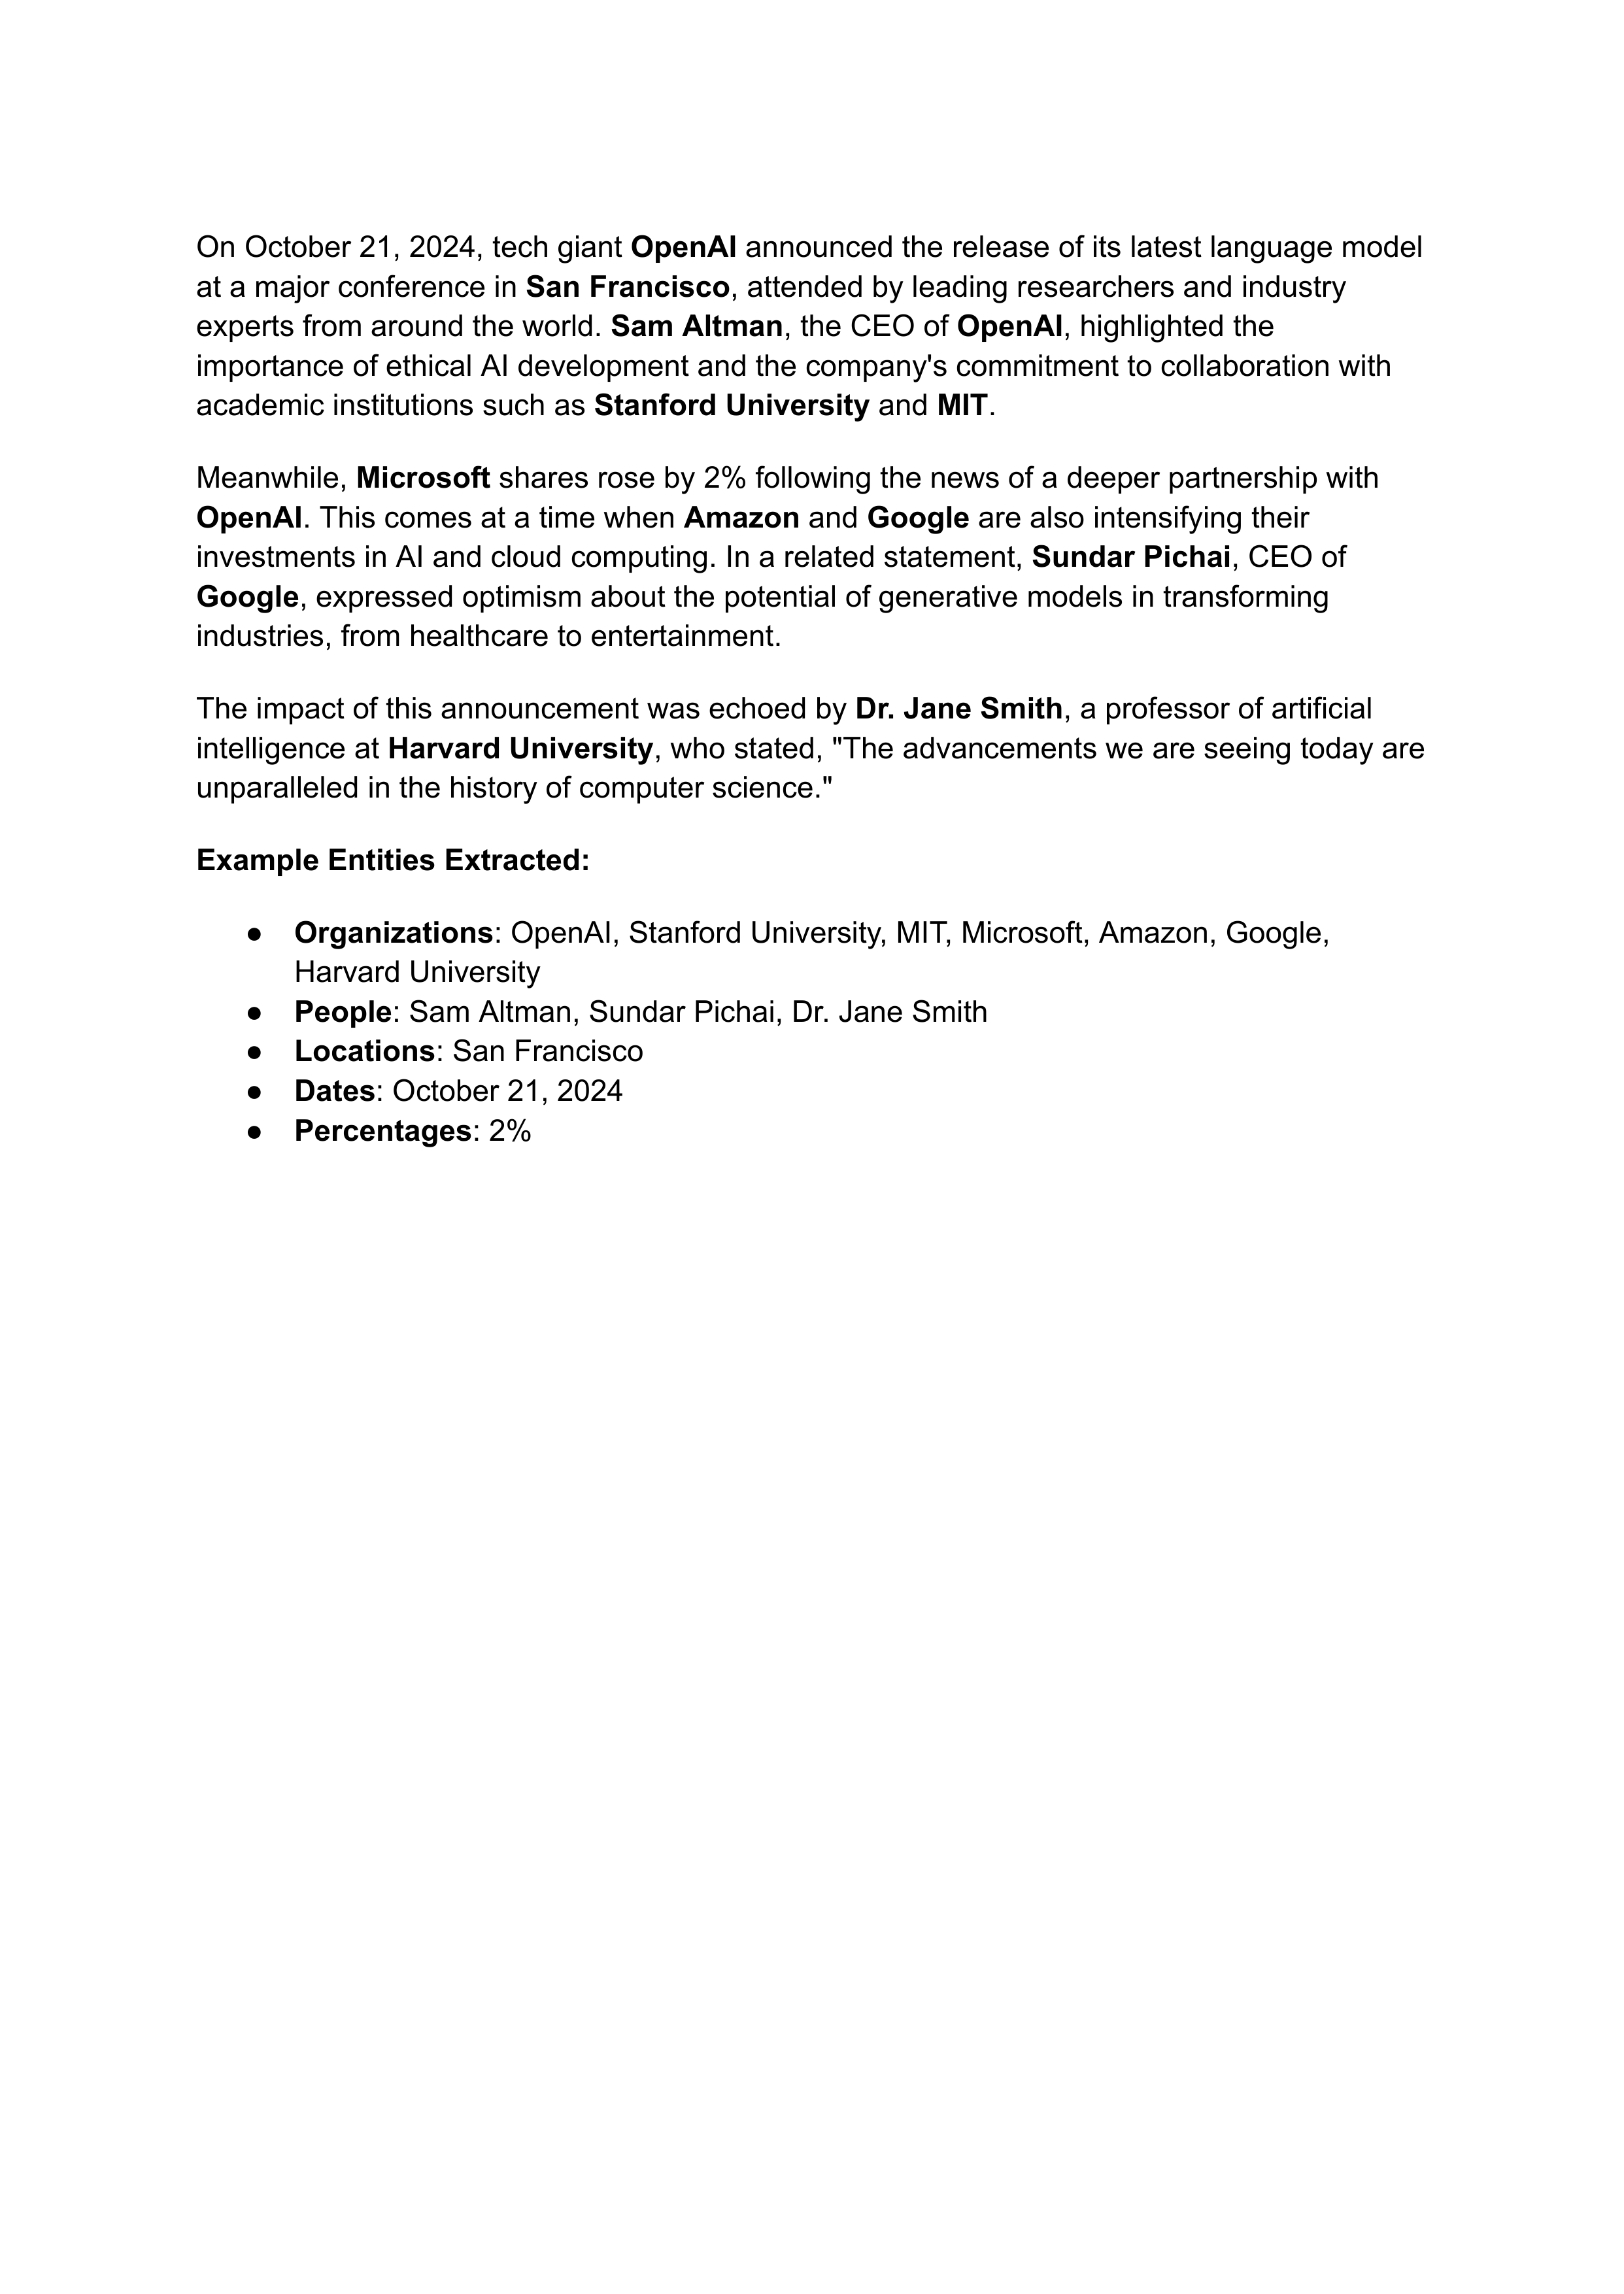

In [7]:
pdf_df = spark.read.format("binaryFile").load("./data/pdfs/example.pdf")

pdf_df.show_pdf()

## Run Ner for Pdf document

In [8]:
pipeline = PipelineModel(stages=[
    PdfDataToImage(),
    TesseractOcr(keepInputData=True),
    Ner(model="dslim/bert-base-NER"),
    ImageDrawBoxes(inputCols=["image", "ner"], displayDataList=["entity_group", "score"],
                   textSize=30, lineWidth=3)
])

result = pipeline.transform(pdf_df).cache()

result.show_ner("ner")

+------------+------------------+-------------------+-----+----+--------------------+
|entity_group|             score|               word|start| end|               boxes|
+------------+------------------+-------------------+-----+----+--------------------+
|         ORG|0.9992890357971191|             OpenAl|   34|  40|[{OpenAl, 0.90458...|
|         LOC|0.9992406368255615|      San Francisco|  119| 132|[{San, 0.95797309...|
|         PER|0.9997135400772095|         Sam Altman|  212| 222|[{Sam, 0.96336723...|
|         ORG|0.9989818930625916|             OpenAl|  235| 241|[{OpenAl,, 0.7108...|
|         ORG|0.9986900091171265|Stanford University|  372| 391|[{Stanford, 0.961...|
|         ORG|0.9987601041793823|                MIT|  396| 399|[{MIT., 0.9693145...|
|         ORG|0.9992747902870178|          Microsoft|  414| 423|[{Microsoft, 0.96...|
|         ORG|0.9976556301116943|           This com|  492| 500|[{This, 0.9644501...|
|         ORG|0.9985396862030029|             Amazon| 

## Visualize NER

In [9]:
result.visualize_ner("ner")

## Visualize Ner results on original image


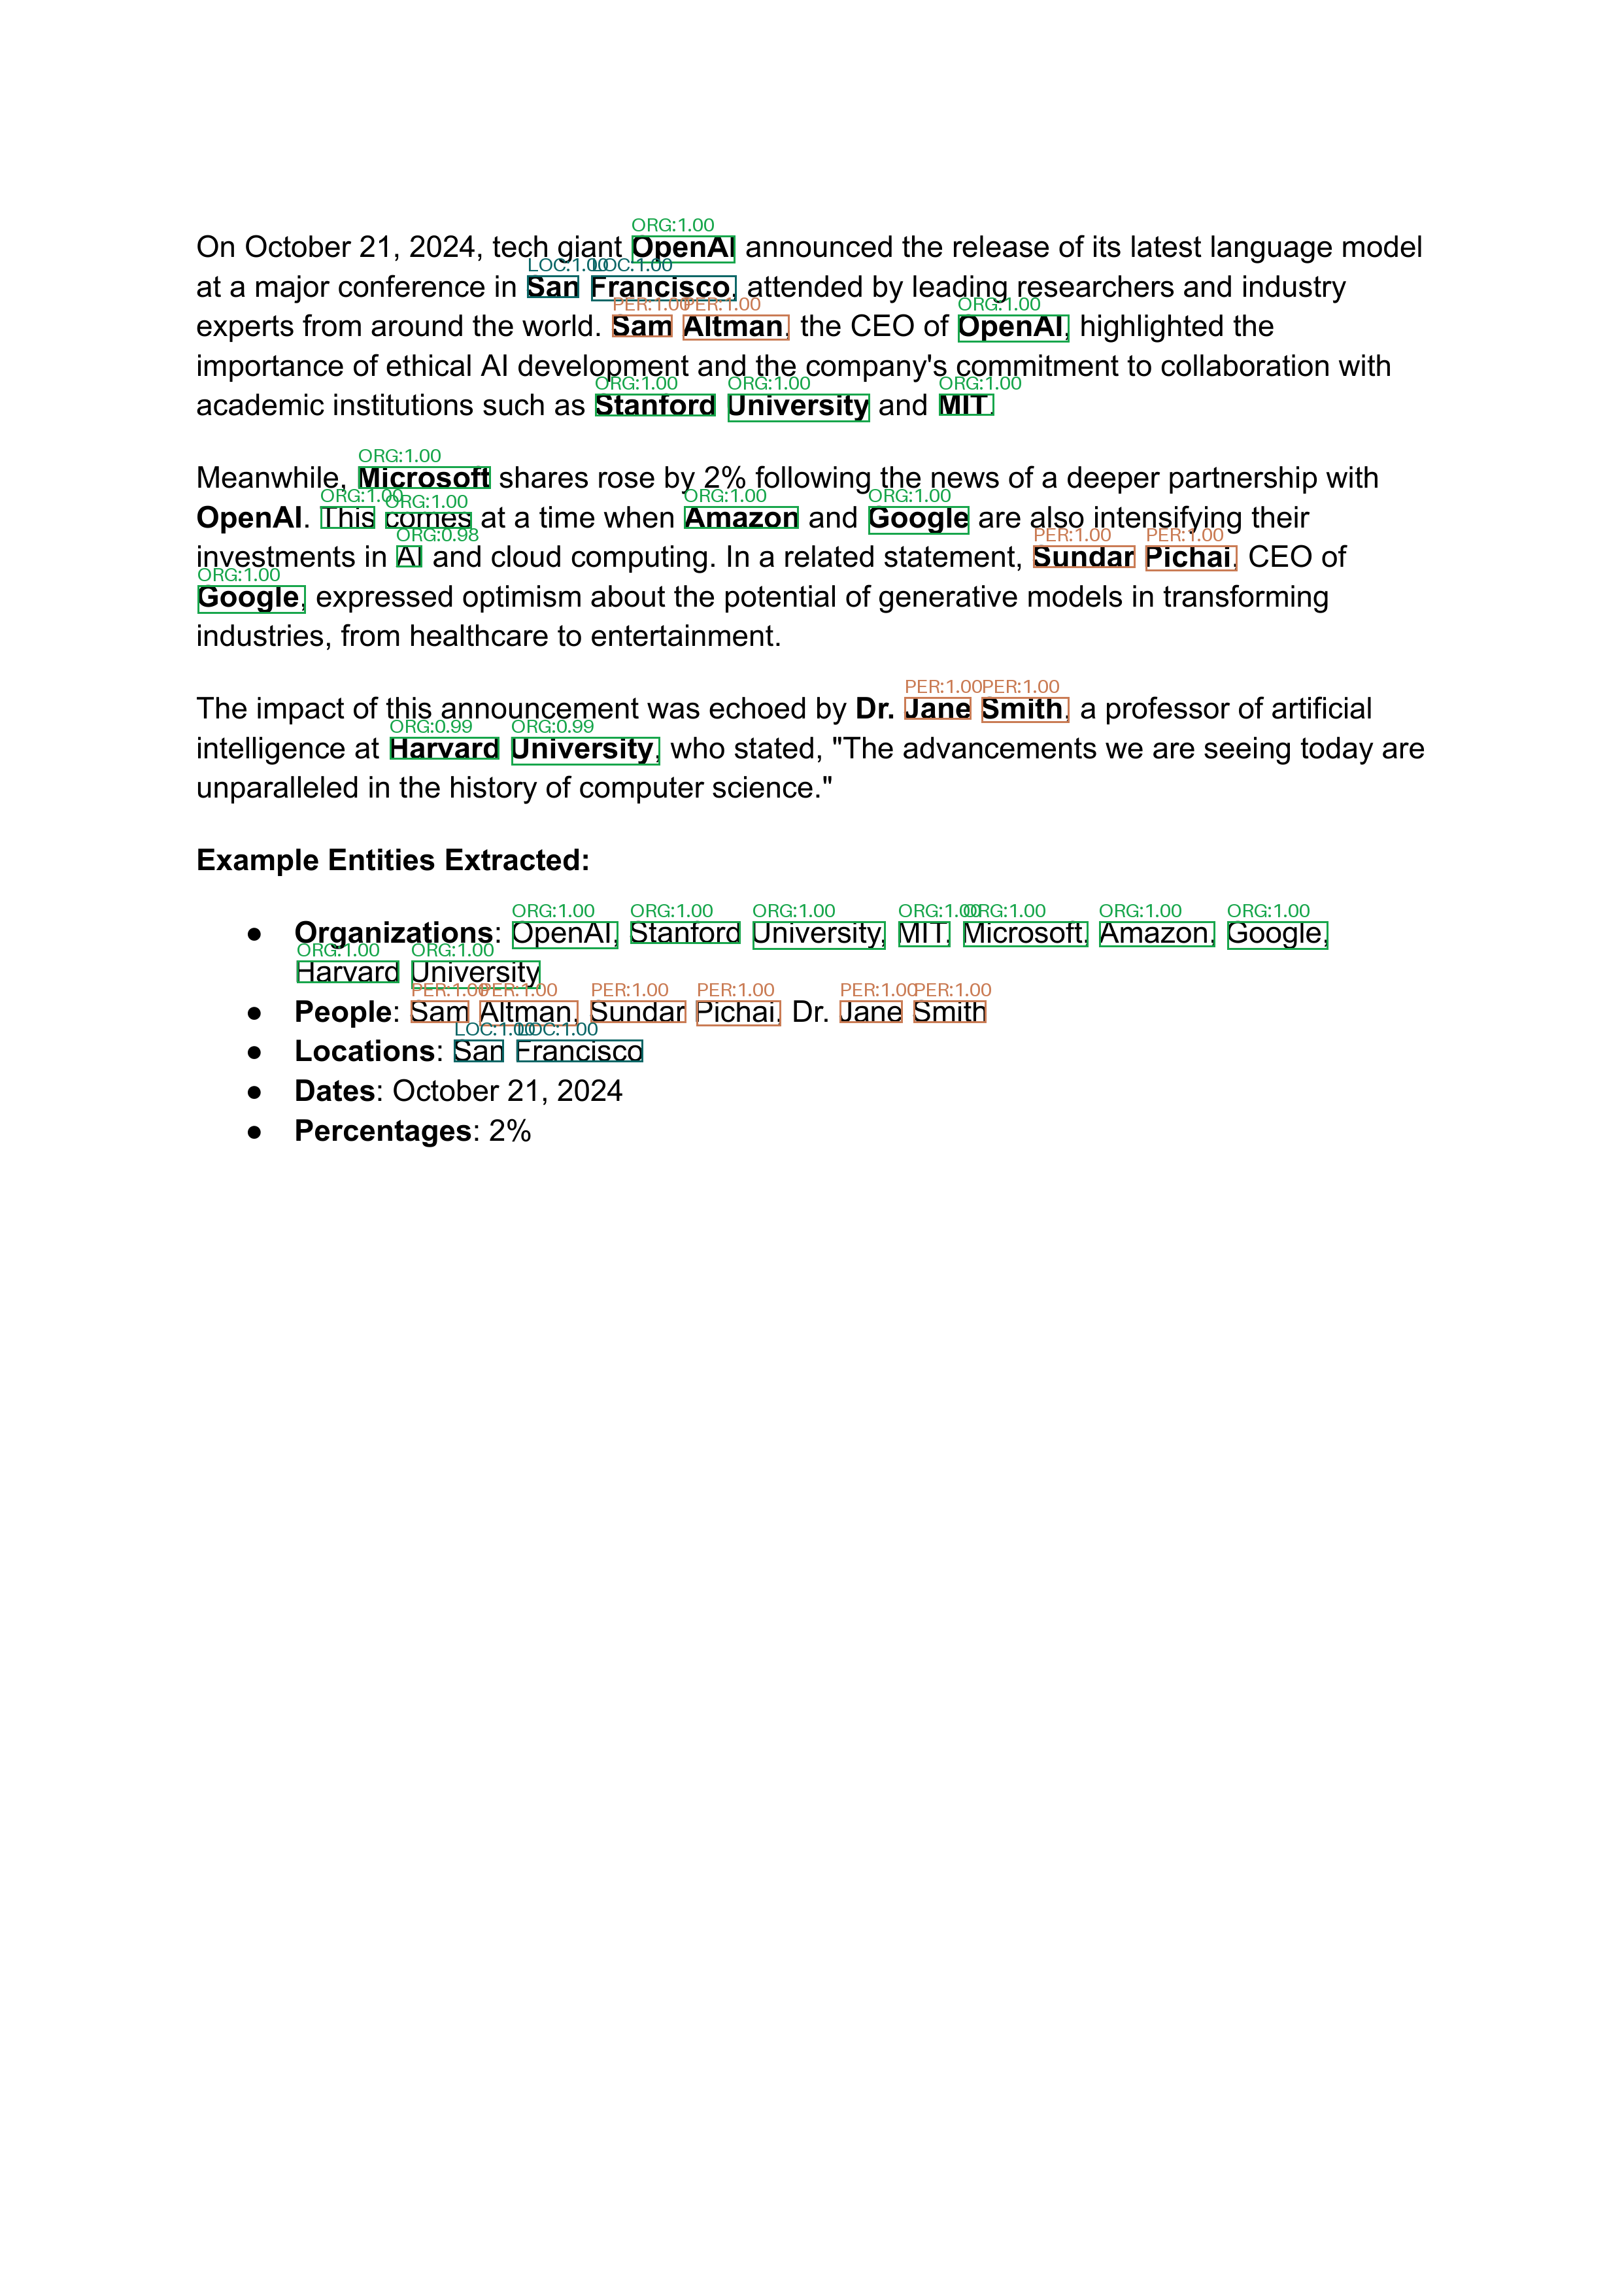

In [10]:
result.show_image("image_with_boxes")